<a href="https://colab.research.google.com/github/Bilal-Ali99/Forest_CoverType/blob/main/Forest_CoverType_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Dataset (Recommended): Covertype (UCI)
* Predict the type of forest cover based on cartographic and environmental features
* Clean and preprocess the data including categorical handling
* Train and evaluate multi-class classification models
* Visualize confusion matrix and feature importance


* Perform Multiclass Class-Classification | Tree based Modelling
* Compare Different models ( Random Forest | XGBoost )
* Perform Hyper Parameter Tuning

In [31]:
# !pip install virtualenv
# !vitualrenv my-venv

In [32]:
# !source my-venv/bin/activate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("/content/drive/MyDrive/elevvo/Task 3/covtype.data",header = None)
print(df.head())

     0    1   2    3    4     5    6    7    8     9   ...  45  46  47  48  \
0  2596   51   3  258    0   510  221  232  148  6279  ...   0   0   0   0   
1  2590   56   2  212   -6   390  220  235  151  6225  ...   0   0   0   0   
2  2804  139   9  268   65  3180  234  238  135  6121  ...   0   0   0   0   
3  2785  155  18  242  118  3090  238  238  122  6211  ...   0   0   0   0   
4  2595   45   2  153   -1   391  220  234  150  6172  ...   0   0   0   0   

   49  50  51  52  53  54  
0   0   0   0   0   0   5  
1   0   0   0   0   0   5  
2   0   0   0   0   0   2  
3   0   0   0   0   0   2  
4   0   0   0   0   0   5  

[5 rows x 55 columns]


In [3]:
print(df.shape)

(581012, 55)


In [4]:
print(df.describe())

                  0              1              2              3   \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean     2959.365301     155.656807      14.103704     269.428217   
std       279.984734     111.913721       7.488242     212.549356   
min      1859.000000       0.000000       0.000000       0.000000   
25%      2809.000000      58.000000       9.000000     108.000000   
50%      2996.000000     127.000000      13.000000     218.000000   
75%      3163.000000     260.000000      18.000000     384.000000   
max      3858.000000     360.000000      66.000000    1397.000000   

                  4              5              6              7   \
count  581012.000000  581012.000000  581012.000000  581012.000000   
mean       46.418855    2350.146611     212.146049     223.318716   
std        58.295232    1559.254870      26.769889      19.768697   
min      -173.000000       0.000000       0.000000       0.000000   
25%         7.000000    1106.0000

In [5]:
info_file = '/content/drive/MyDrive/elevvo/Task 3/covtype.info'

try:
  with open(info_file,'r') as file:
    content = file.readlines()
    print(content)
    for line in content:
      print(line.strip())
except FileNotFoundError:
  print(f"Error: File '{info_file}' not found.")
except Exception as e:
  print(f"An error occurred: {e}")

['The Forest CoverType dataset\n', '\n', '\n', '1.\tTitle of Database:\n', '\n', '\tForest Covertype data\n', '\n', '\n', '2.\tSources:\n', '\n', '\t(a) Original owners of database:\n', '\t\tRemote Sensing and GIS Program\n', '\t\tDepartment of Forest Sciences\n', '\t\tCollege of Natural Resources\n', '\t\tColorado State University\n', '\t\tFort Collins, CO  80523\n', "\t\t(contact Jock A. Blackard, jblackard 'at' fs.fed.us\n", "\t\t      or Dr. Denis J. Dean, denis.dean 'at' utdallas.edu)\n", '\n', '\tNOTE:\tReuse of this database is unlimited with retention of \n', '\t\tcopyright notice for Jock A. Blackard and Colorado \n', '\t\tState University.\n', '\n', '\t(b) Donors of database:\n', "\t\tJock A. Blackard (jblackard 'at' fs.fed.us)\n", '\t\tGIS Coordinator\n', '\t\tUSFS - Forest Inventory & Analysis\n', '\t\tRocky Mountain Research Station\n', '\t\t507 25th Street\n', '\t\tOgden, UT 84401\n', '\n', "\t\tDr. Denis J. Dean (denis.dean 'at' utdallas.edu)\n", '\t\tProfessor\n', '\t\t

In [6]:
old_info_file = '/content/drive/MyDrive/elevvo/Task 3/old_covtype.info'

try:
  with open(old_info_file,'r') as file:
    old_content = file.readlines()
    print(old_content)
    for line in old_content:
      print(line.strip())
except FileNotFoundError:
  print(f"Error: File '{info_file}' not found.")
except Exception as e:
  print(f"An error occurred: {e}")

['The Forest CoverType dataset\n', '\n', '\n', '1.\tTitle of Database:\n', '\n', '\tForest Covertype data\n', '\n', '\n', '2.\tSources:\n', '\n', '\t(a) Original owners of database:\n', '\t\tRemote Sensing and GIS Program\n', '\t\tDepartment of Forest Sciences\n', '\t\tCollege of Natural Resources\n', '\t\tColorado State University\n', '\t\tFort Collins, CO  80523\n', '\t\t(contact Jock A. Blackard, jblackard/wo_ftcol@fs.fed.us\n', '\t\t      or Dr. Denis J. Dean, denis@cnr.colostate.edu)\n', '\n', '\tNOTE:\tReuse of this database is unlimited with retention of \n', '\t\tcopyright notice for Jock A. Blackard and Colorado State University.\n', '\n', '\t(b) Donors of database:\n', '\t\tJock A. Blackard (jblackard/wo_ftcol@fs.fed.us)\n', '\t\tUSDA Forest Service\n', '\t\t3825 E. Mulberry\n', '\t\tFort Collins, CO  80524  USA\n', '\n', '\t\tDr. Denis J. Dean (denis@cnr.colostate.edu)\n', '\t\tAssociate Professor\n', '\t\tDepartment of Forest Sciences\n', '\t\tColorado State University\n', 

In [7]:
# As the data we have has no columns in it so we will have to proivde the columns names by ourselves

# Their are about 10 quantative attributes, 4 binary atttributes and 40 binary soil type variables

columns = ['Elevations','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points'] + [f'Wilderness_Area_{i}' for i in range(1,5)] + [f'Soil_Type_{i}' for i in range (1,41) ] + ['Cover_Type']

df = pd.read_csv("/content/drive/MyDrive/elevvo/Task 3/covtype.data",header = None,names = columns)
df.head()

,Elevations,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [8]:
df.isnull().sum()

,0
Elevations,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0


In [9]:
df.dtypes

,0
Elevations,int64
Aspect,int64
Slope,int64
Horizontal_Distance_To_Hydrology,int64
Vertical_Distance_To_Hydrology,int64
Horizontal_Distance_To_Roadways,int64
Hillshade_9am,int64
Hillshade_Noon,int64
Hillshade_3pm,int64
Horizontal_Distance_To_Fire_Points,int64


In [10]:
from sklearn.preprocessing import StandardScaler
numerical_cols = columns[:10]  # First 10 are numerical
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

/tmp/ipython-input-1435095554.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'Cover_Type', palette = 'viridis')


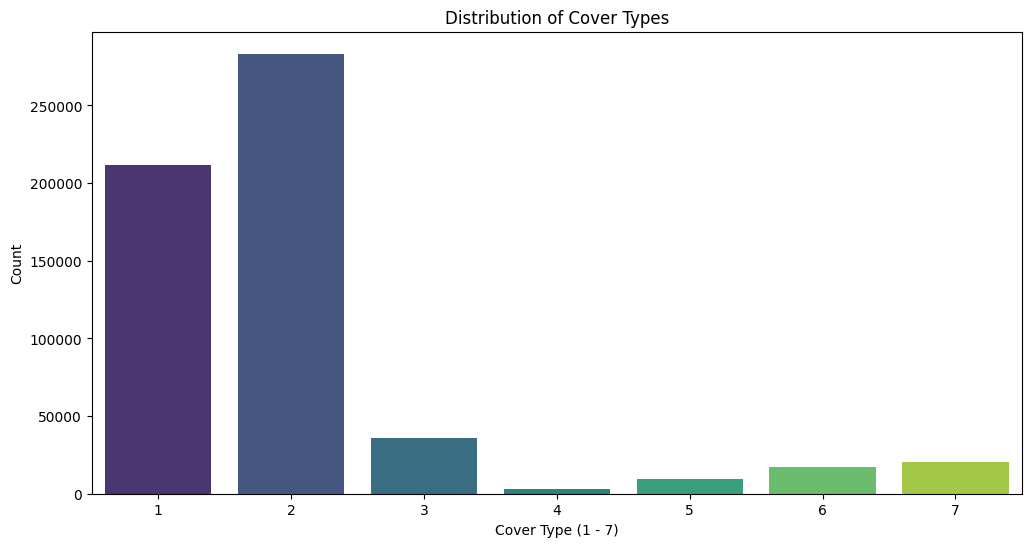

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(data = df, x = 'Cover_Type', palette = 'viridis')
plt.title('Distribution of Cover Types')
plt.xlabel('Cover Type (1 - 7)')
plt.ylabel('Count')
plt.show()

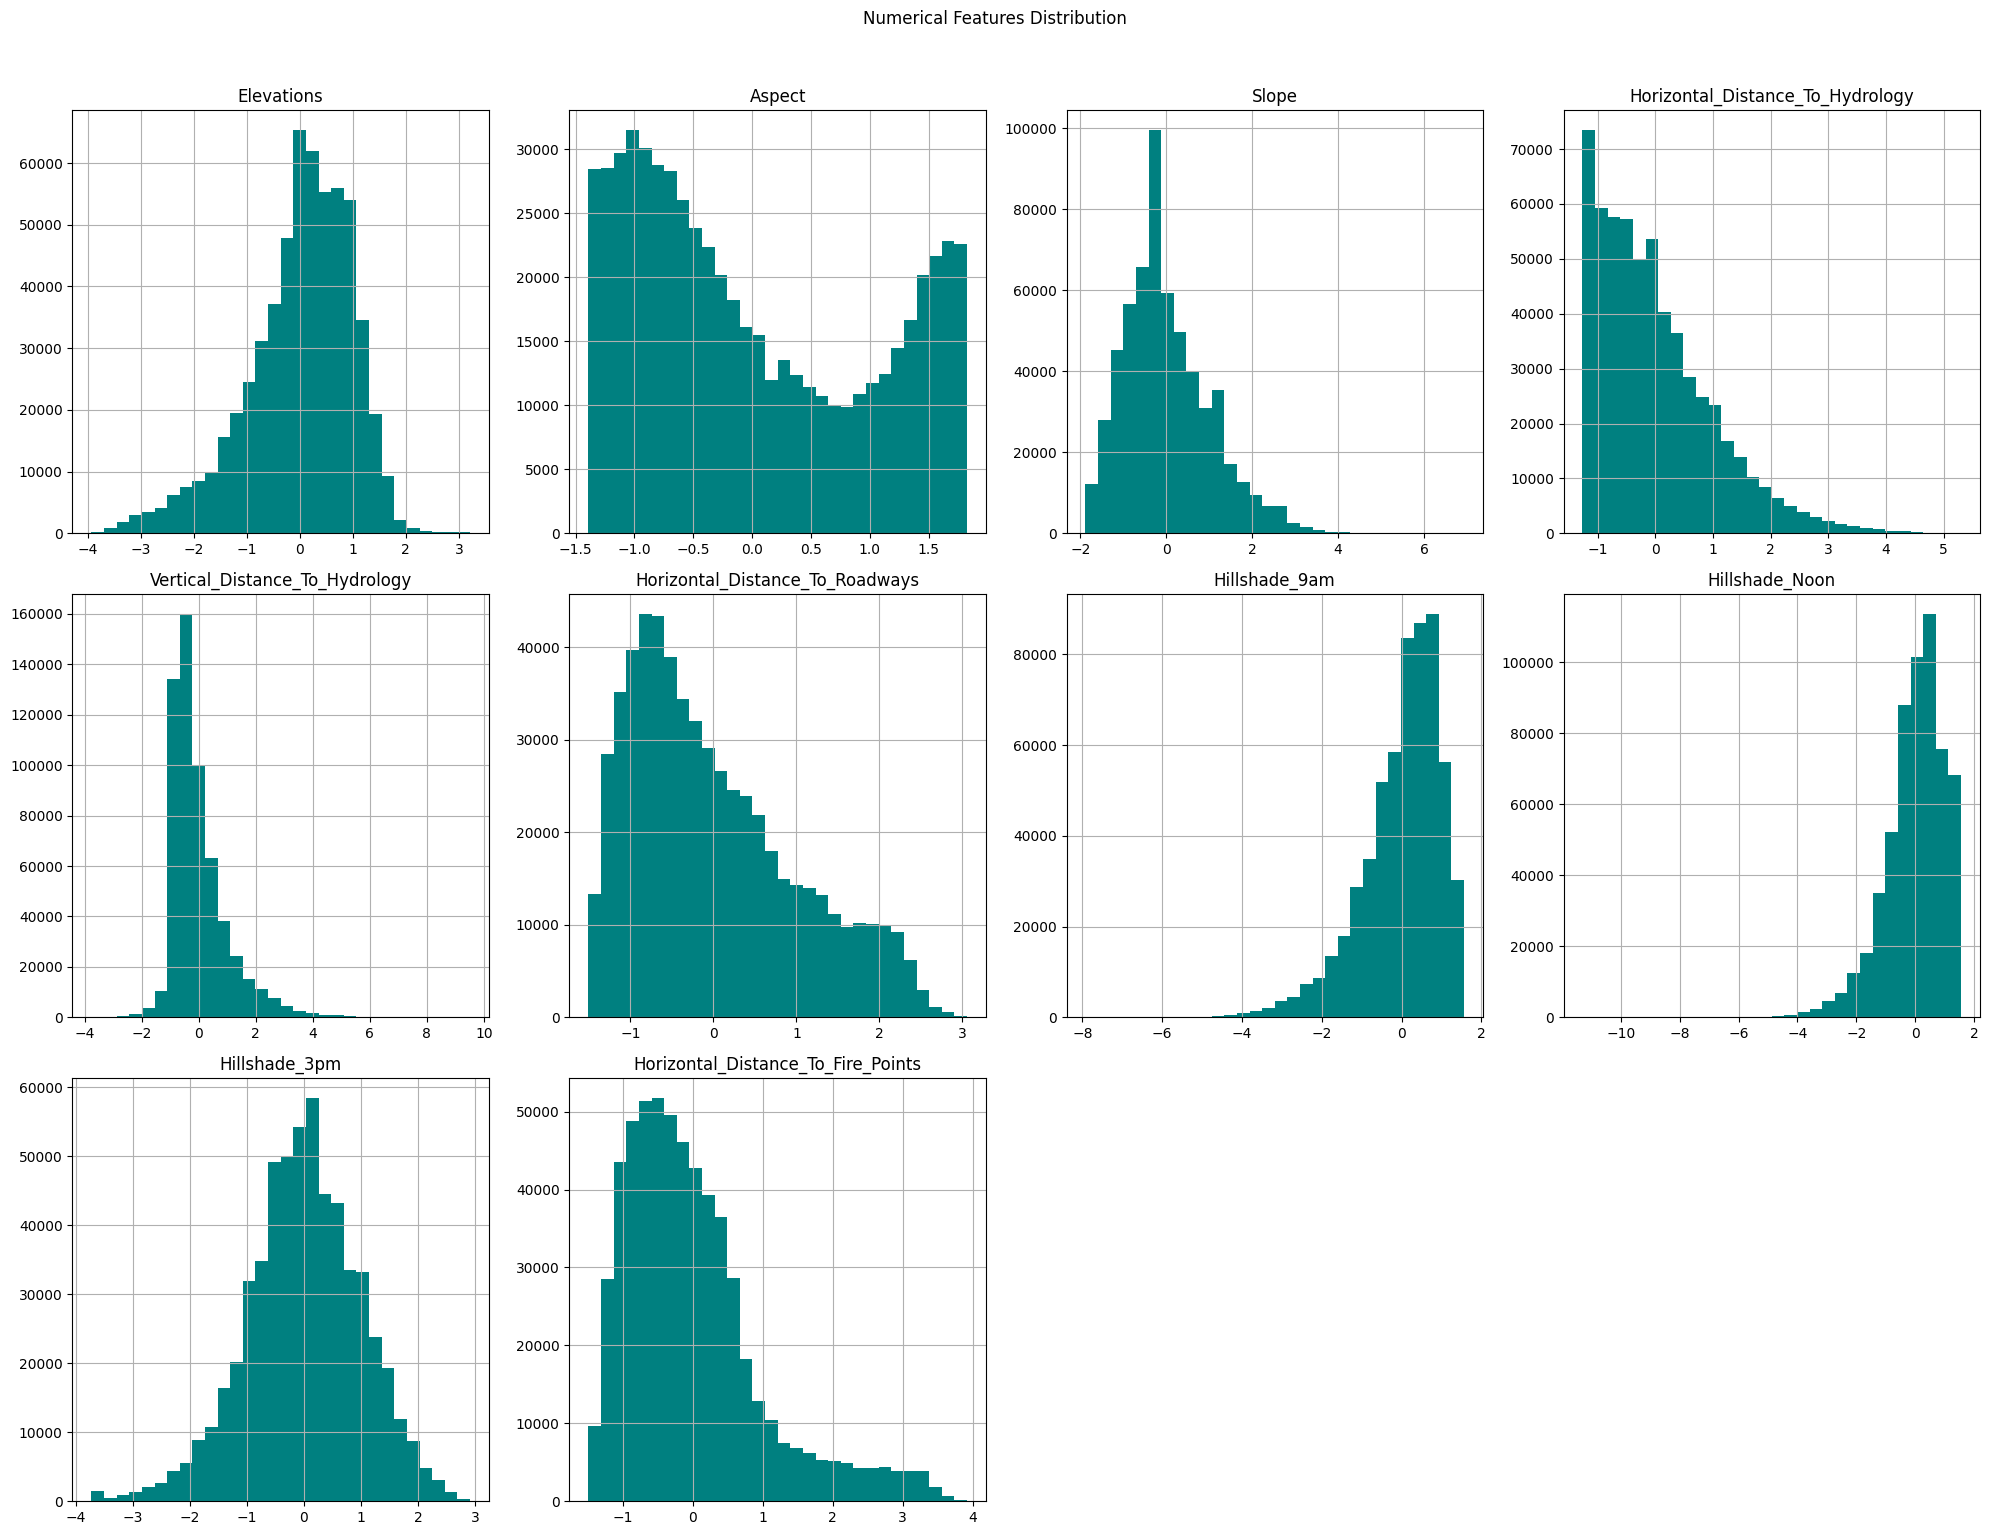

In [12]:
df[numerical_cols].hist(bins = 30 , figsize = (20,15), layout = (3,4), color = 'teal')
plt.suptitle('Numerical Features Distribution',y=1.02)
plt.tight_layout()
plt.show()

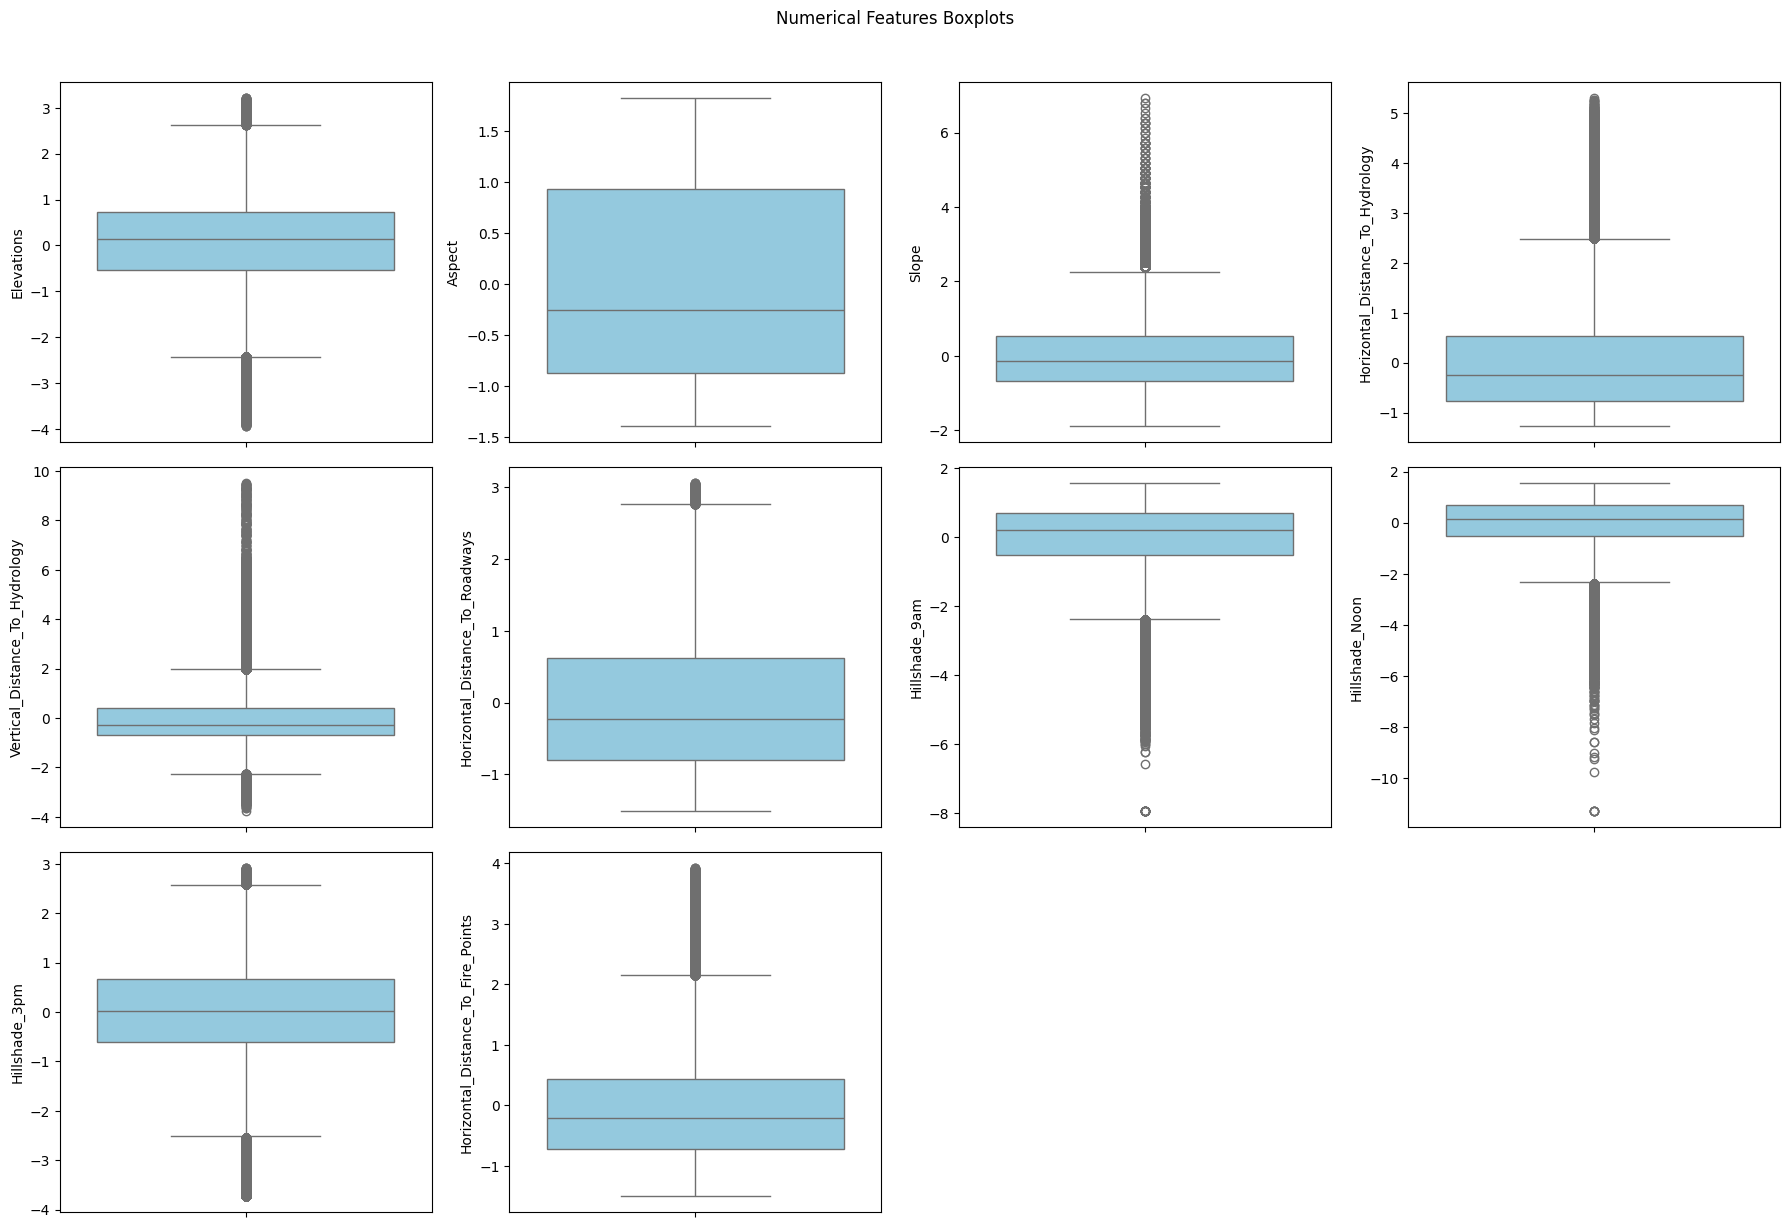

In [13]:
plt.figure(figsize=(18,12))
for i, col in enumerate(numerical_cols[:10],1):
  plt.subplot(3,4,i)
  sns.boxplot(y=df[col],color='skyblue')
plt.suptitle('Numerical Features Boxplots',y=1.02)
plt.tight_layout()
plt.show()

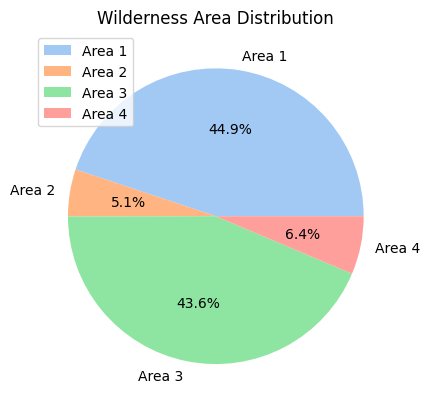

In [14]:
wild_cols = [f'Wilderness_Area_{i}' for i in range(1,5)]
wild_counts = df[wild_cols].sum()
plt.pie(wild_counts, labels=[f"Area {i}" for i in range(1,5)],
autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Wilderness Area Distribution')
plt.legend()
plt.show()

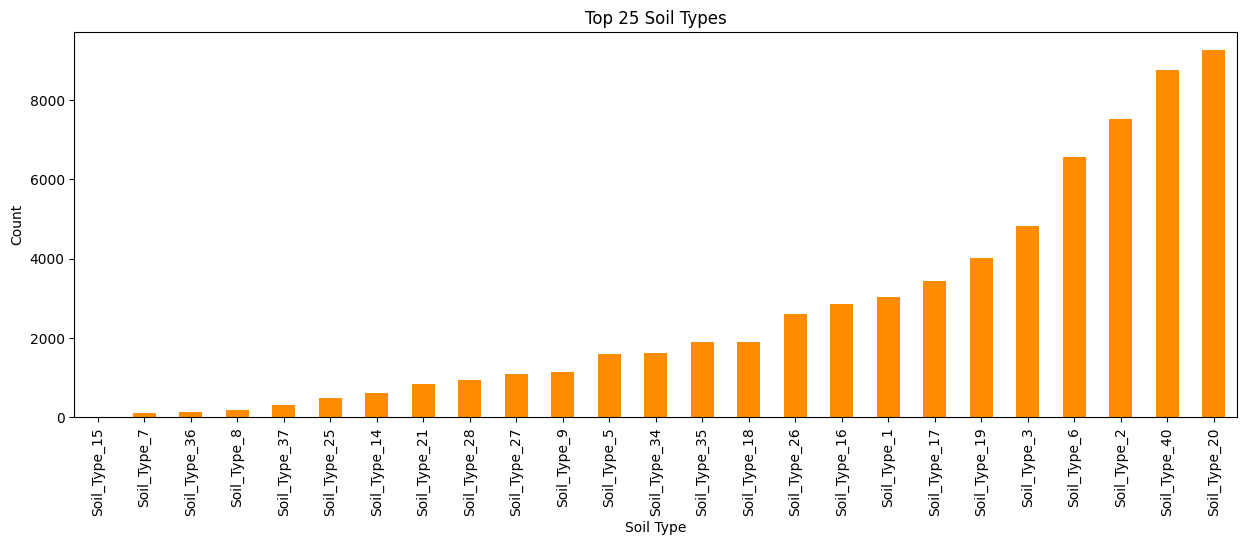

In [15]:
soil_cols = [f'Soil_Type_{i}' for i in range(1,41)]
soil_counts = df[soil_cols].sum().sort_values(ascending=True)[:25]
soil_counts.plot(kind='bar',figsize=(15,5),color='darkorange')
plt.title('Top 25 Soil Types')
plt.xlabel('Soil Type')
plt.ylabel('Count')
plt.show()

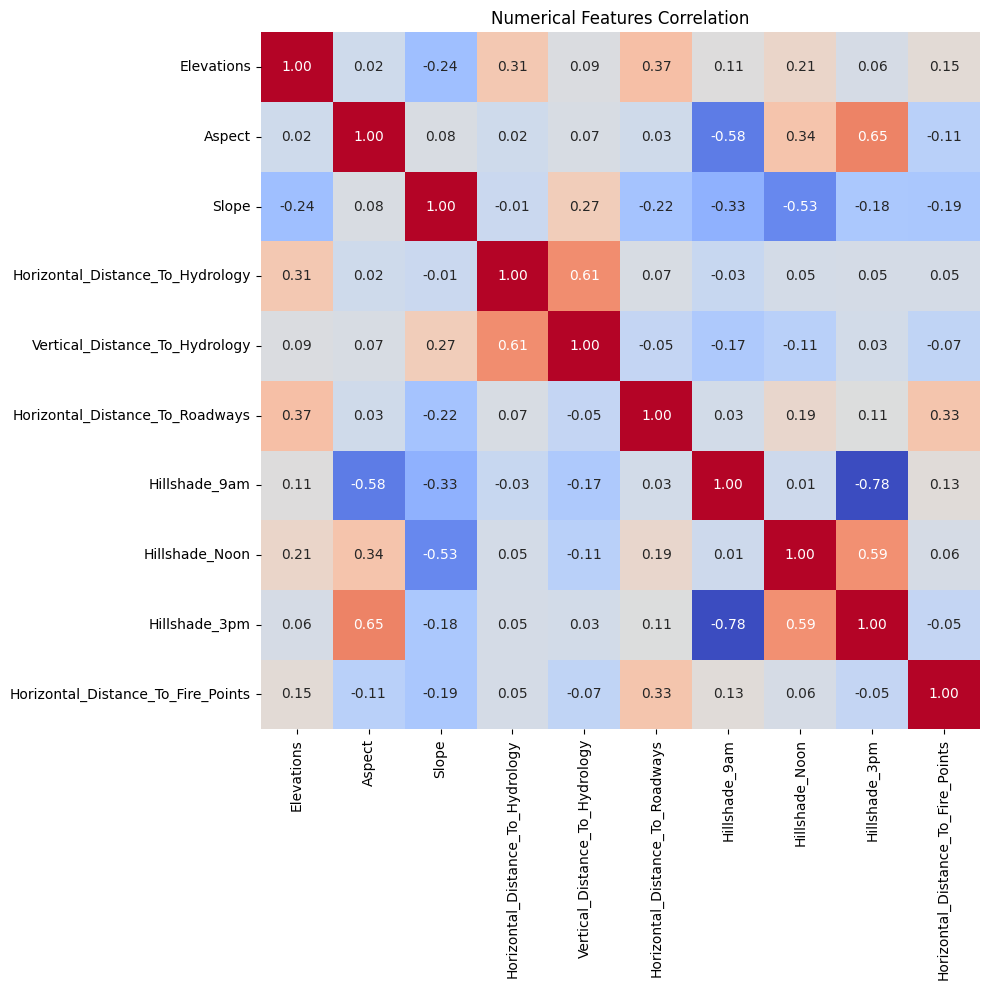

In [16]:
plt.figure(figsize=(10,10))
corr = df[numerical_cols].corr()
sns.heatmap(corr,annot=True,fmt='.2f',cmap='coolwarm',annot_kws={'size':10},cbar=False)
plt.title('Numerical Features Correlation')
plt.tight_layout()
plt.show()

/tmp/ipython-input-2708461445.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df,x='Cover_Type',y='Elevations',palette='Set2',inner='quartile')


Text(0.5, 0, 'Cover Type')

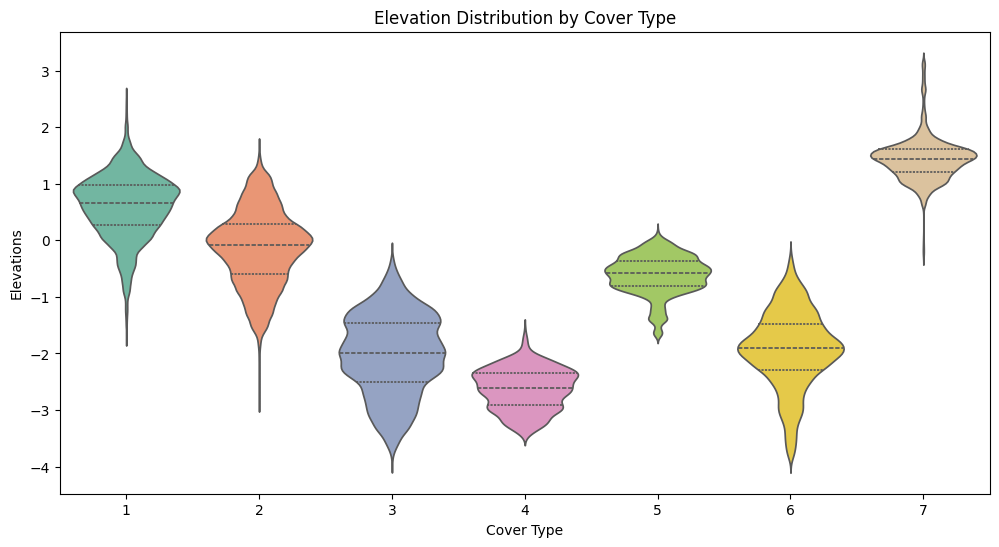

In [17]:
plt.figure(figsize=(12,6))
sns.violinplot(data=df,x='Cover_Type',y='Elevations',palette='Set2',inner='quartile')
plt.title('Elevation Distribution by Cover Type')
plt.xlabel('Cover Type')

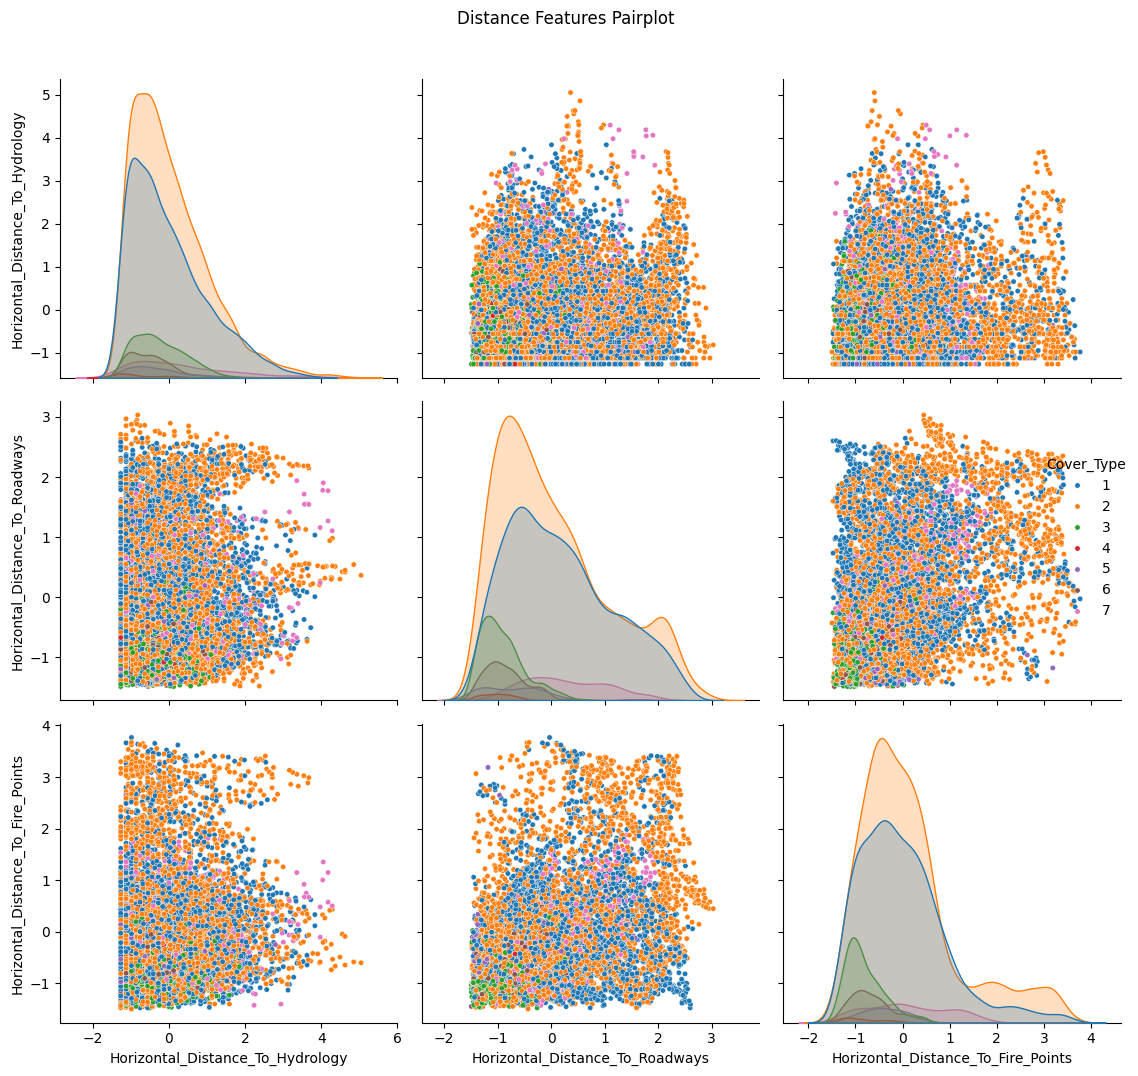

In [18]:
distance_cols = ['Horizontal_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points']
sns.pairplot(df.sample(10000)[distance_cols + ['Cover_Type']],height=3.5,hue='Cover_Type',palette='tab10',plot_kws={'alpha':1.,'s':15})
plt.suptitle('Distance Features Pairplot',y=1.02)
plt.tight_layout()
plt.show()

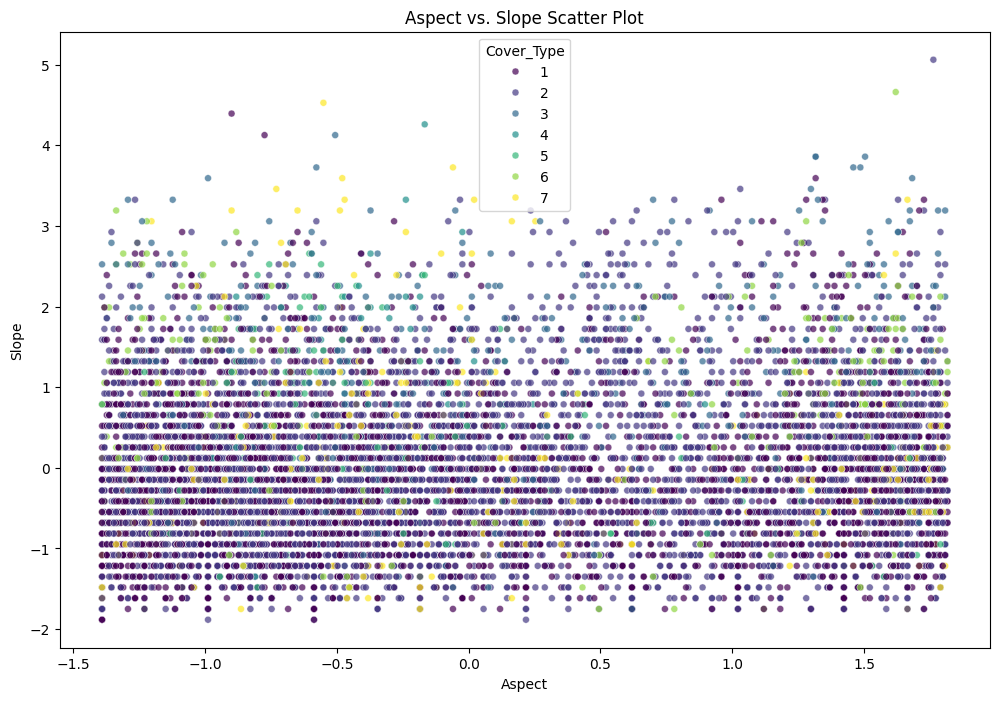

In [19]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df.sample(10000),x='Aspect',y='Slope',hue='Cover_Type',palette='viridis',alpha=0.7,s=25)
plt.title('Aspect vs. Slope Scatter Plot')
plt.xlabel('Aspect')
plt.ylabel('Slope')
plt.show()

/tmp/ipython-input-2964615155.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Cover_Type',y=col,palette='Blues')
/tmp/ipython-input-2964615155.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Cover_Type',y=col,palette='Blues')
/tmp/ipython-input-2964615155.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,x='Cover_Type',y=col,palette='Blues')


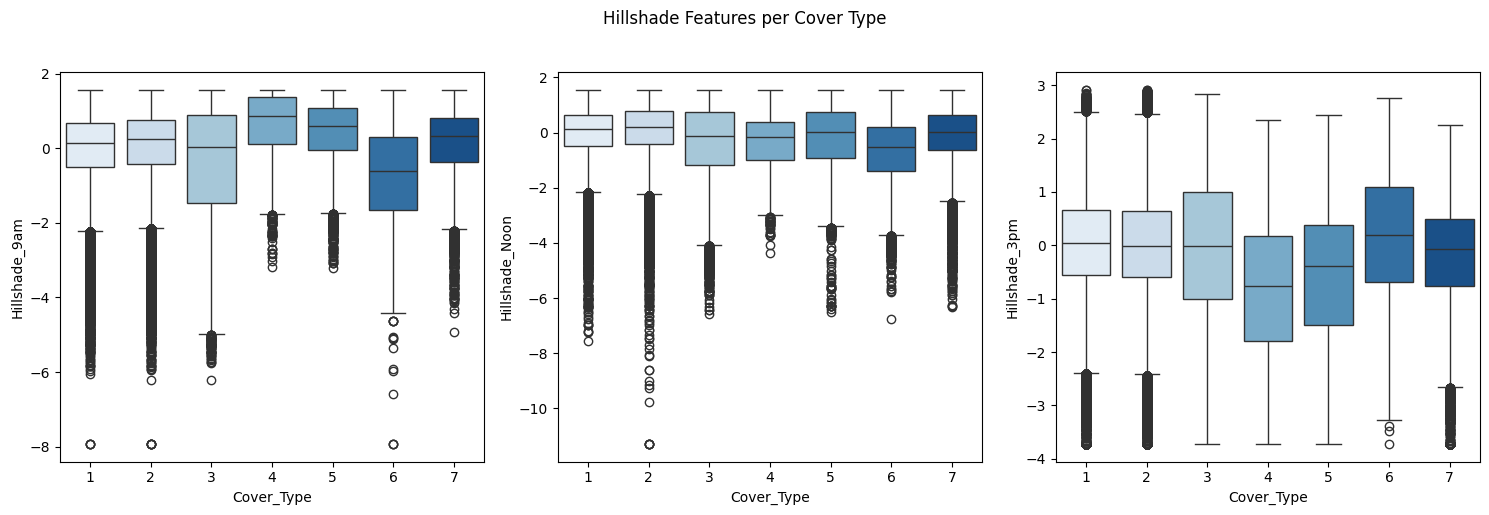

In [20]:
hillshade_cols = ['Hillshade_9am','Hillshade_Noon','Hillshade_3pm']
plt.figure(figsize=(15,5))
for i,col in enumerate(hillshade_cols,1):
  plt.subplot(1,3,i)
  sns.boxplot(data=df,x='Cover_Type',y=col,palette='Blues')
plt.suptitle('Hillshade Features per Cover Type',y=1.02)
plt.tight_layout()
plt.show()

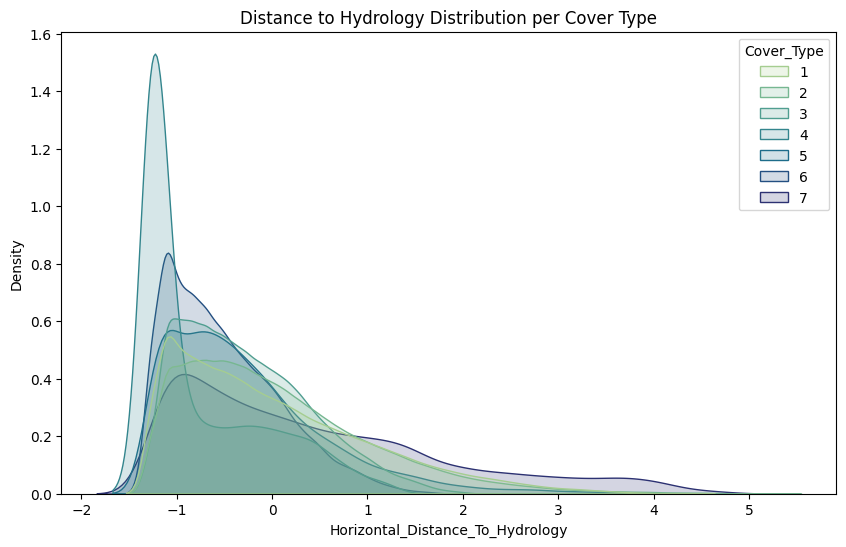

In [21]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df,x='Horizontal_Distance_To_Hydrology',hue='Cover_Type',palette='crest',fill=True,alpha=0.2,common_norm=False,)
plt.title('Distance to Hydrology Distribution per Cover Type')
plt.show()

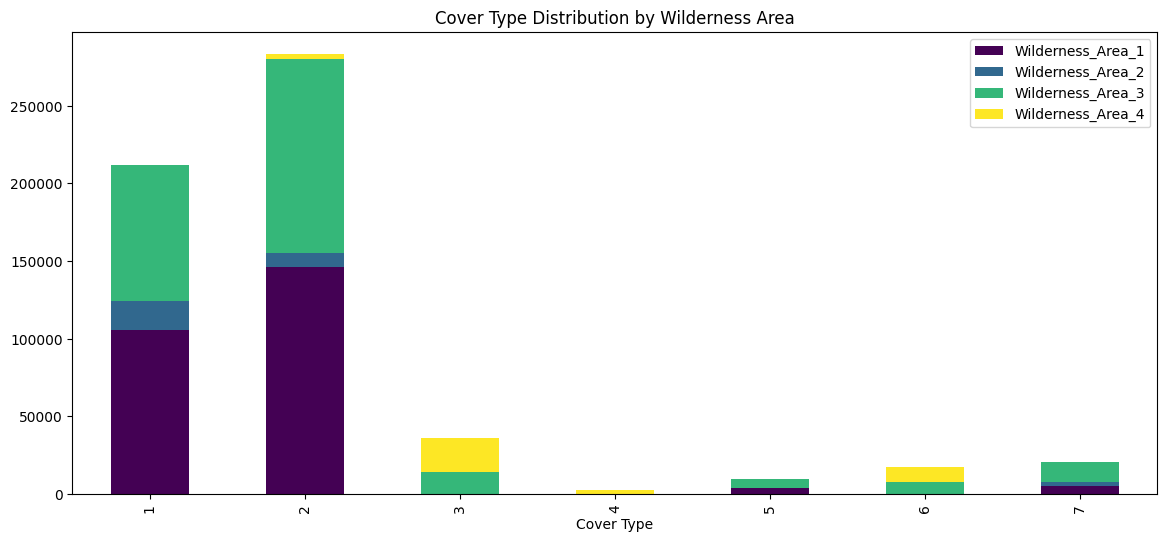

In [22]:
wild_df = df[wild_cols + ['Cover_Type']].groupby('Cover_Type').sum()
wild_df.plot(kind='bar',stacked=True, figsize=(14,6),colormap='viridis')
plt.title('Cover Type Distribution by Wilderness Area')
plt.xlabel('Cover Type')
plt.show()

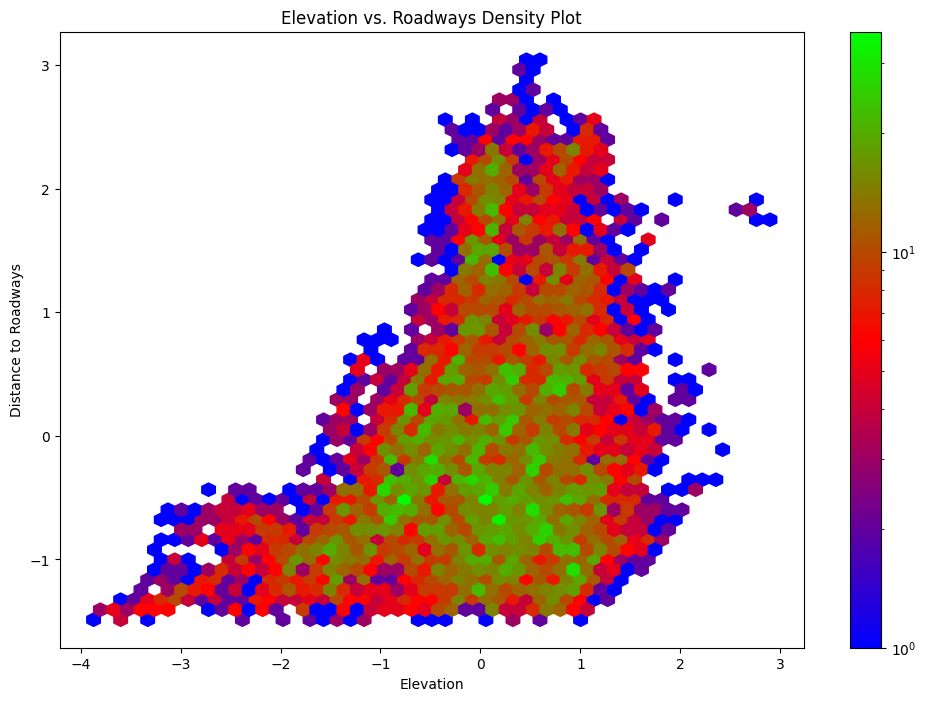

In [23]:
plt.figure(figsize=(12,8))
df_sample = df.sample(10000)
plt.hexbin(df_sample['Elevations'],
           df_sample['Horizontal_Distance_To_Roadways'],
           gridsize = 50,cmap='brg',bins='log')
plt.colorbar()
plt.xlabel('Elevation')
plt.ylabel('Distance to Roadways')
plt.title('Elevation vs. Roadways Density Plot')
plt.show()

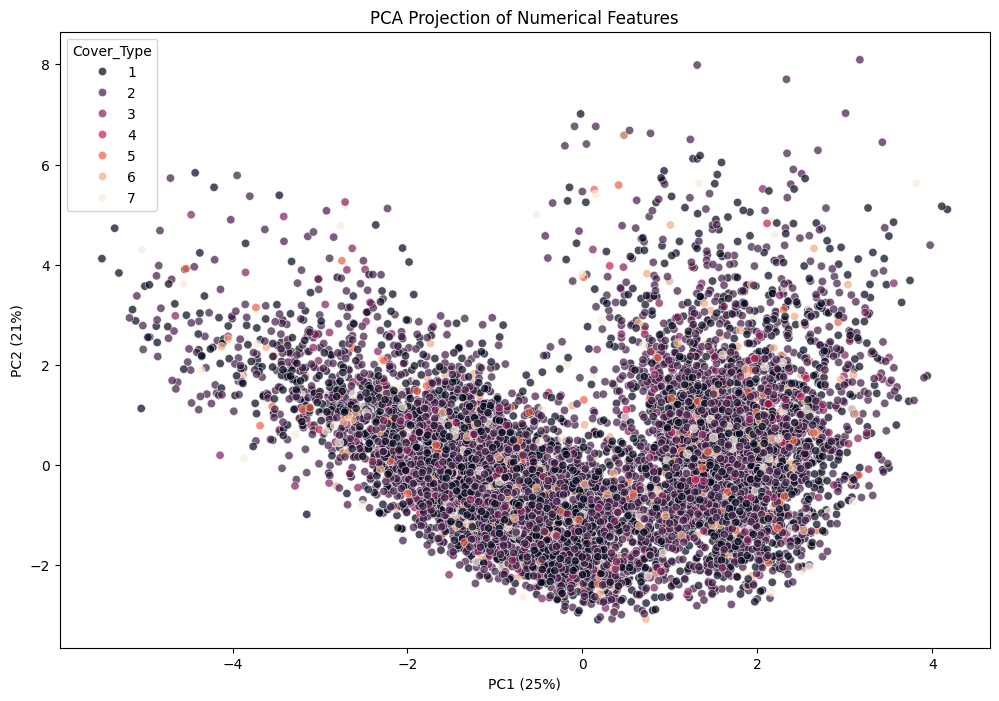

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(df[numerical_cols].sample(10000))
plt.figure(figsize=(12,8))
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1],hue=df['Cover_Type'].sample(10000),palette='rocket',alpha=0.7)
plt.title('PCA Projection of Numerical Features')
plt.xlabel('PC1 ({}%)'.format(int(pca.explained_variance_ratio_[0]*100)))
plt.ylabel('PC2 ({}%)'.format(int(pca.explained_variance_ratio_[1]*100)))
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay,confusion_matrix

In [29]:
X = df.drop('Cover_Type',axis=1)
y = df['Cover_Type']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)


In [30]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [31]:
y_train_adj = y_train -1
y_test_adj = y_test -1

xgb = XGBClassifier(use_label_encoder=False,eval_metric='mlogloss',random_state=42)
xgb.fit(X_train,y_train_adj)
preds = xgb.predict(X_test) + 1

print("Unique y_train:", np.unique(y_train))
print("Unique y_train_adj:", np.unique(y_train_adj))

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:53:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Unique y_train: [1 2 3 4 5 6 7]
Unique y_train_adj: [0 1 2 3 4 5 6]


In [32]:
print(f"Random Forest Accuracy: {accuracy_score(y_test,rf.predict(X_test))}")
print(f"XGBoost Accuracy: {accuracy_score(y_test,xgb.predict(X_test))}")

Random Forest Accuracy: 0.953245613280208
XGBoost Accuracy: 0.05912067674672771


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           1       0.96      0.94      0.95     42368
           2       0.95      0.97      0.96     56661
           3       0.94      0.96      0.95      7151
           4       0.92      0.86      0.89       549
           5       0.95      0.77      0.85      1899
           6       0.93      0.89      0.91      3473
           7       0.97      0.95      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.95      0.91      0.92    116203
weighted avg       0.95      0.95      0.95    116203

